# **File Paths**

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)
sys.path.append(os.path.join(project_root, "src", "models"))
sys.path.append(os.path.join(project_root, "src", "data"))
sys.path.append(os.path.join(project_root, "src", "visualizations"))
sys.path.append(os.path.join(project_root, "src", "features"))

In [2]:
from load_data import *

# **K-means clustering**

**Loading in preprocessed dataset**

In [3]:
df = load_data(r"F:\University\Uni Stuff (semester 11)\Thesis\code\data\processed\FE_data_for_clustering.csv")
df.head()

Data loaded successfully from F:\University\Uni Stuff (semester 11)\Thesis\code\data\processed\FE_data_for_clustering.csv


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,-6.147045,-0.498399,1.358508,-2.921305,2.516850,-3.215847
1,-6.136265,-0.472298,1.355169,-2.915644,2.615129,-3.065447
2,-6.103923,-0.393994,1.345153,-2.898660,2.909964,-2.614248
3,-6.136265,-0.472298,1.355169,-2.915644,2.615129,-3.065447
4,-7.418826,-0.478542,-0.994393,-0.544143,2.586872,-0.464135


**Finding optimal value for k**

In [4]:
from visualizations.plot_inertia import plot_inertia

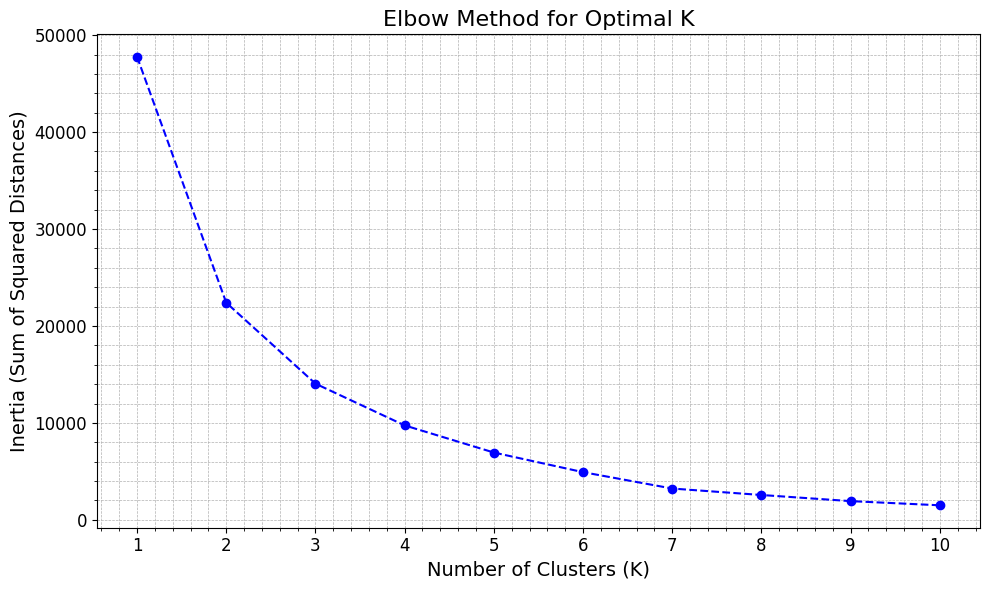

In [5]:
plot_inertia(df)

**Generating model with optimal k**

In [6]:
from models.train_models import k_means_model

In [7]:
cluster_df = k_means_model(df)

Cluster centers (in scaled space):
[[-2.64415251  2.22021122  0.53873859  0.07392034 -0.14958414  0.20501769]
 [ 3.12155775 -0.40279432 -0.22910544 -0.01286367  0.02903539 -0.07078297]
 [-7.45766742 -1.12775361 -3.41647336  0.98963923  0.38130219 -0.91955032]
 [-5.11720364 -4.45538842  2.35150655 -0.98806329  0.03902722  0.4758867 ]]
Silhouette Score: 0.77


**Plot of PCA components**

In [8]:
from visualizations.plot_results import pairplot_k_means,visualize_clusters

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

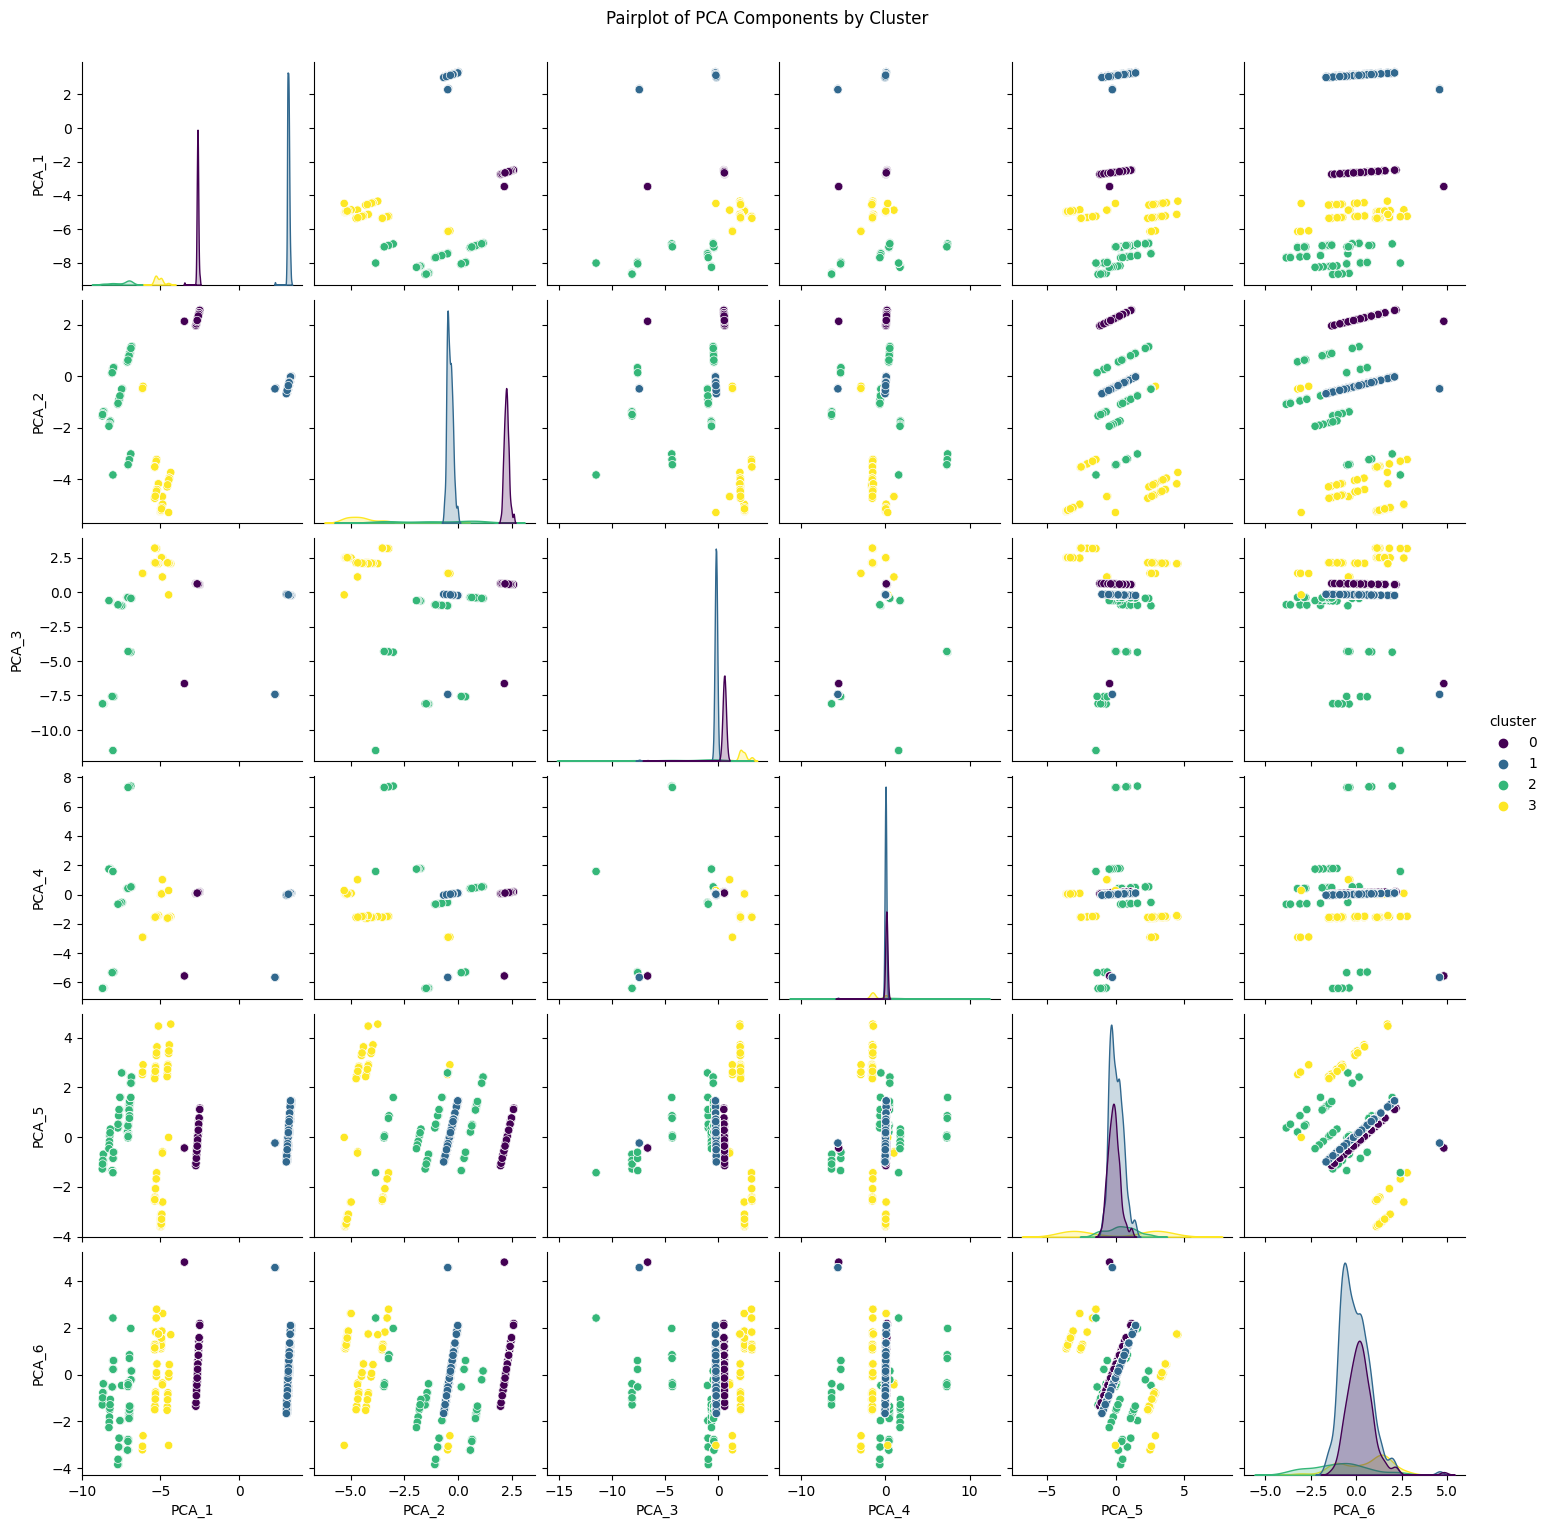

<Figure size 640x480 with 0 Axes>

In [9]:
pairplot_k_means(df)

In [10]:
visualize_clusters(df,r'F:\University\Uni Stuff (semester 11)\Thesis\code\reports\figures\t-SNE cluster visualization.html')

Plot saved to F:\University\Uni Stuff (semester 11)\Thesis\code\reports\figures\t-SNE cluster visualization.html


**Finding crime hotspots**

In [11]:
mapping_df = load_data(r'F:\University\Uni Stuff (semester 11)\Thesis\code\data\processed\crime_location_mapping.csv')
df_final = cluster_df.merge(mapping_df, left_index=True, right_index=True, how="left")

Data loaded successfully from F:\University\Uni Stuff (semester 11)\Thesis\code\data\processed\crime_location_mapping.csv


In [12]:
from models.evaluate_model import cluster_summary

In [13]:
cls_df = cluster_summary(df_final)

   cluster  total_crime_count  avg_crime_count
1        1               1145      1145.000000
0        0                624       624.000000
3        3                172        34.400000
2        2                140        46.666667


In [14]:
display(cls_df)

,cluster,Crime_Location_raw,crime_count
1,1,matuail,1145
0,0,sonargaon,624
7,3,narayangonj sadar,137
4,2,rupgonj,65
3,2,morgapara,42
2,2,araihazar,33
5,3,fatullah,27
9,3,rupgonj,4
8,3,purbachol,3
6,3,highway police,1


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

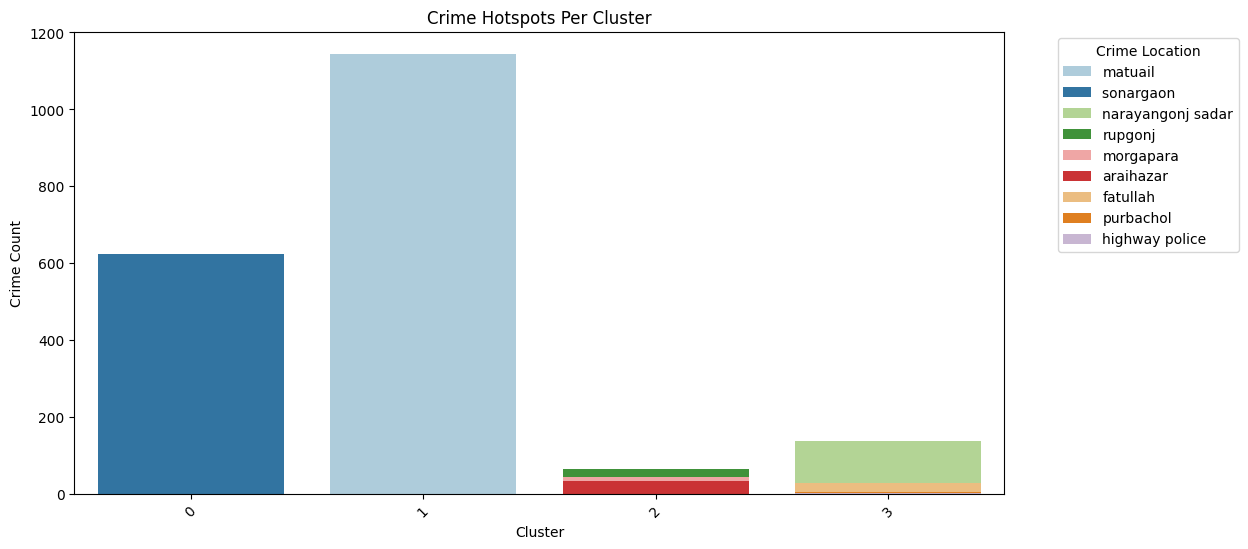

In [15]:
from visualizations.plot_results import hotspots_per_cluster_plot
hotspots_per_cluster_plot(cls_df)

# **LSTM-MLP hybrid model**

##### **Splliting and dimensionality reduction**

Data loaded successfully from F:\University\Uni Stuff (semester 11)\Thesis\code\data\processed\processed_df_lstm_mlp.csv
Optimal number of components for 95% variance: 8


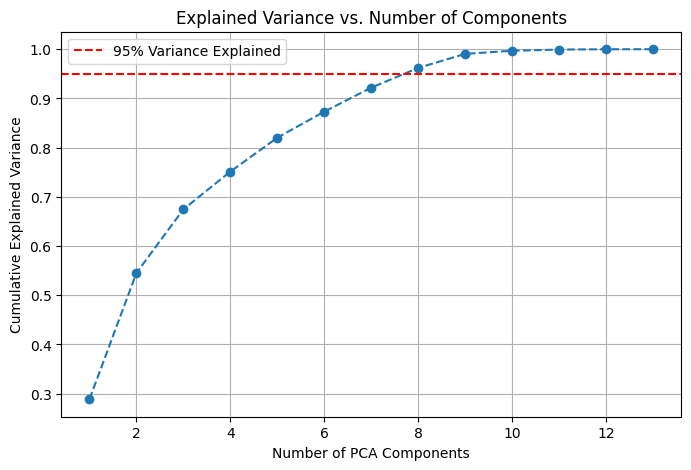

Optimal PCA Components: 8


In [3]:
from features.feature_engineering import prepare_hybrid_model_data
processed_df = load_data(r"F:\University\Uni Stuff (semester 11)\Thesis\code\data\processed\processed_df_lstm_mlp.csv")
train_df, test_df, pca = prepare_hybrid_model_data(
    processed_df, target_columns=['Crime_Location', 'Allegation'], variance_threshold=0.95)

In [4]:
# Verify output shapes
print(f"Training Data Shape: {train_df.shape}")  # (n_samples, optimal_components + 2 targets)
print(f"Testing Data Shape: {test_df.shape}")    # (n_samples, optimal_components + 2 targets)

Training Data Shape: (1664, 10)
Testing Data Shape: (417, 10)


##### **Training model**

LSTM Input Shape: (1655, 10, 8)
MLP Input Shape: (1655, 8)
Target Shapes: (1655,), (1655,)
Number of location classes: 9
Number of crime classes: 29


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ mlp_input           │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_input          │ (None, 10, 8)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        576 │ mlp_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 10, 30)    │      4,680 │ lstm_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │      8,064 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 30)        │        990 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 30)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 62)        │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │      8,064 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ location_output     │ (None, 9)         │      1,161 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ crime_output        │ (None, 31)        │      3,999 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 29,614 (115.68 KB)

 Trainable params: 29,614 (115.68 KB)

 Non-trainable params: 0 (0.00 B)

Model output names: ListWrapper(['location_output', 'crime_output'])
Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - crime_output_loss: 3.2248 - crime_output_sparse_accuracy: 0.1529 - location_output_loss: 1.7449 - location_output_sparse_accuracy: 0.6312 - loss: 5.7401 - val_crime_output_loss: 4.2948 - val_crime_output_sparse_accuracy: 0.0000e+00 - val_location_output_loss: 3.2069 - val_location_output_sparse_accuracy: 0.0060 - val_loss: 8.1807
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - crime_output_loss: 1.7136 - crime_output_sparse_accuracy: 0.2987 - location_output_loss: 0.1372 - location_output_sparse_accuracy: 0.9775 - loss: 2.4454 - val_crime_output_loss: 5.4693 - val_crime_output_sparse_accuracy: 0.0000e+00 - val_location_output_loss: 4.0345 - val_location_output_sparse_accuracy: 0.0060 - val_loss: 10.1537
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - crime_output_loss: 1.1406 - crime_output_sparse_accuracy: 0.5729 - location_output_loss: 0.0636 - location_ou

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509:

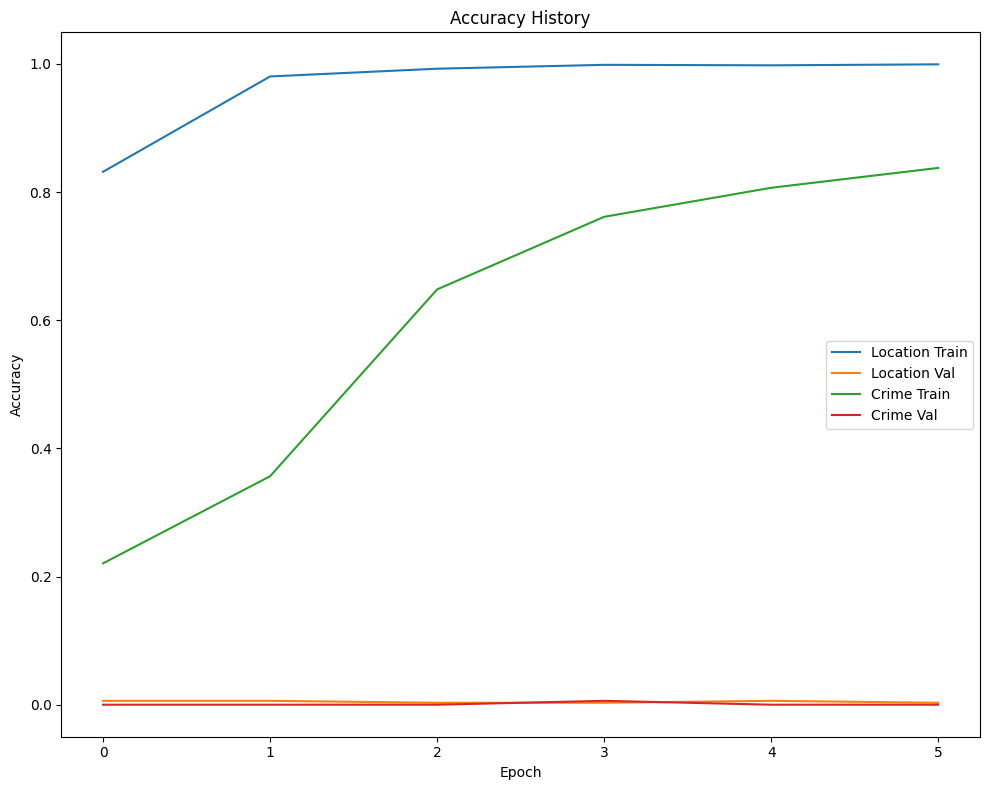

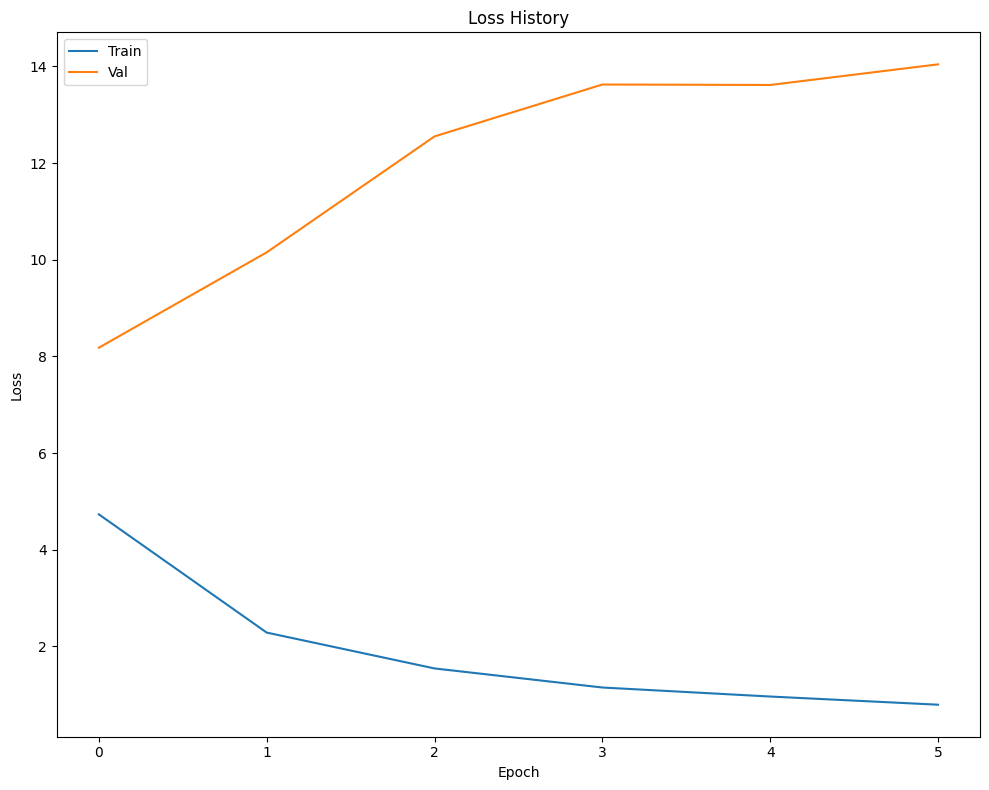

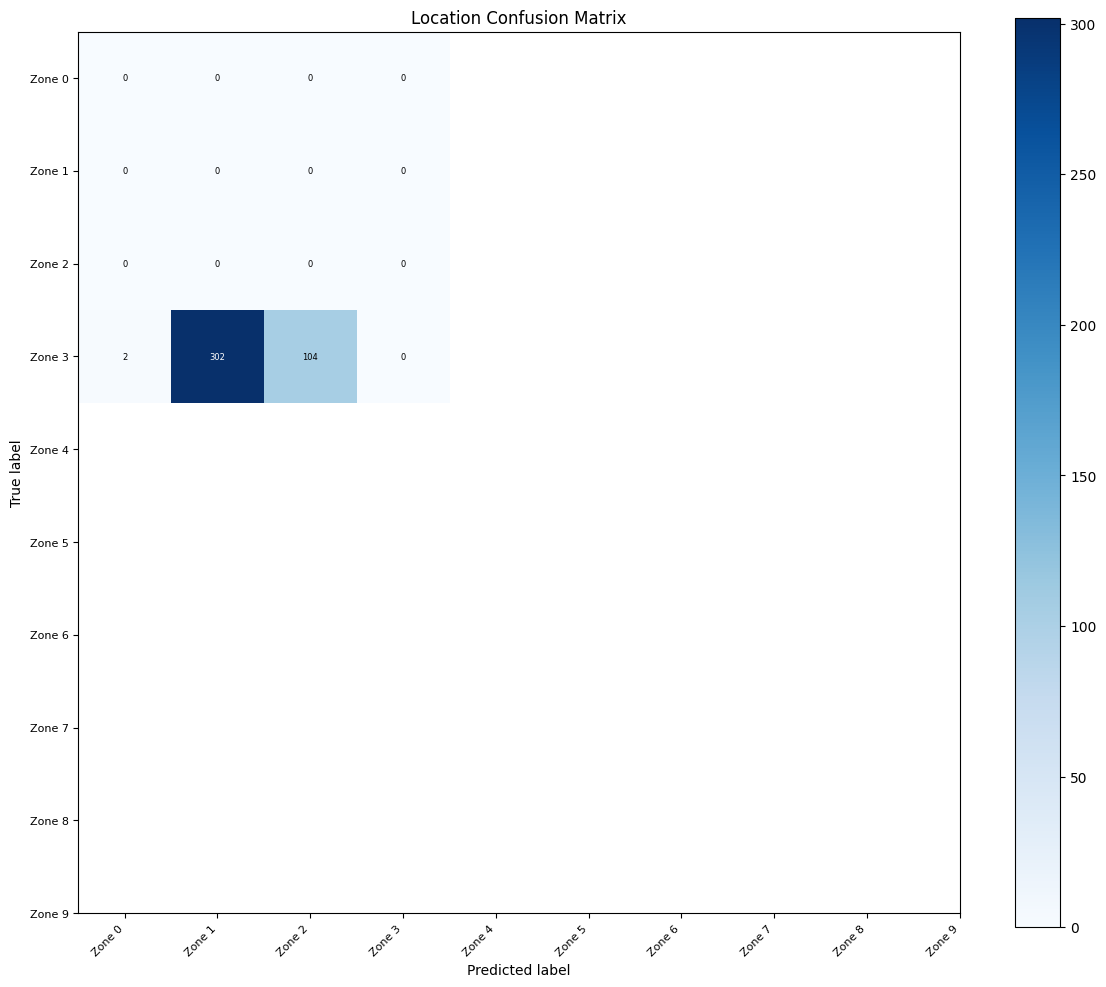

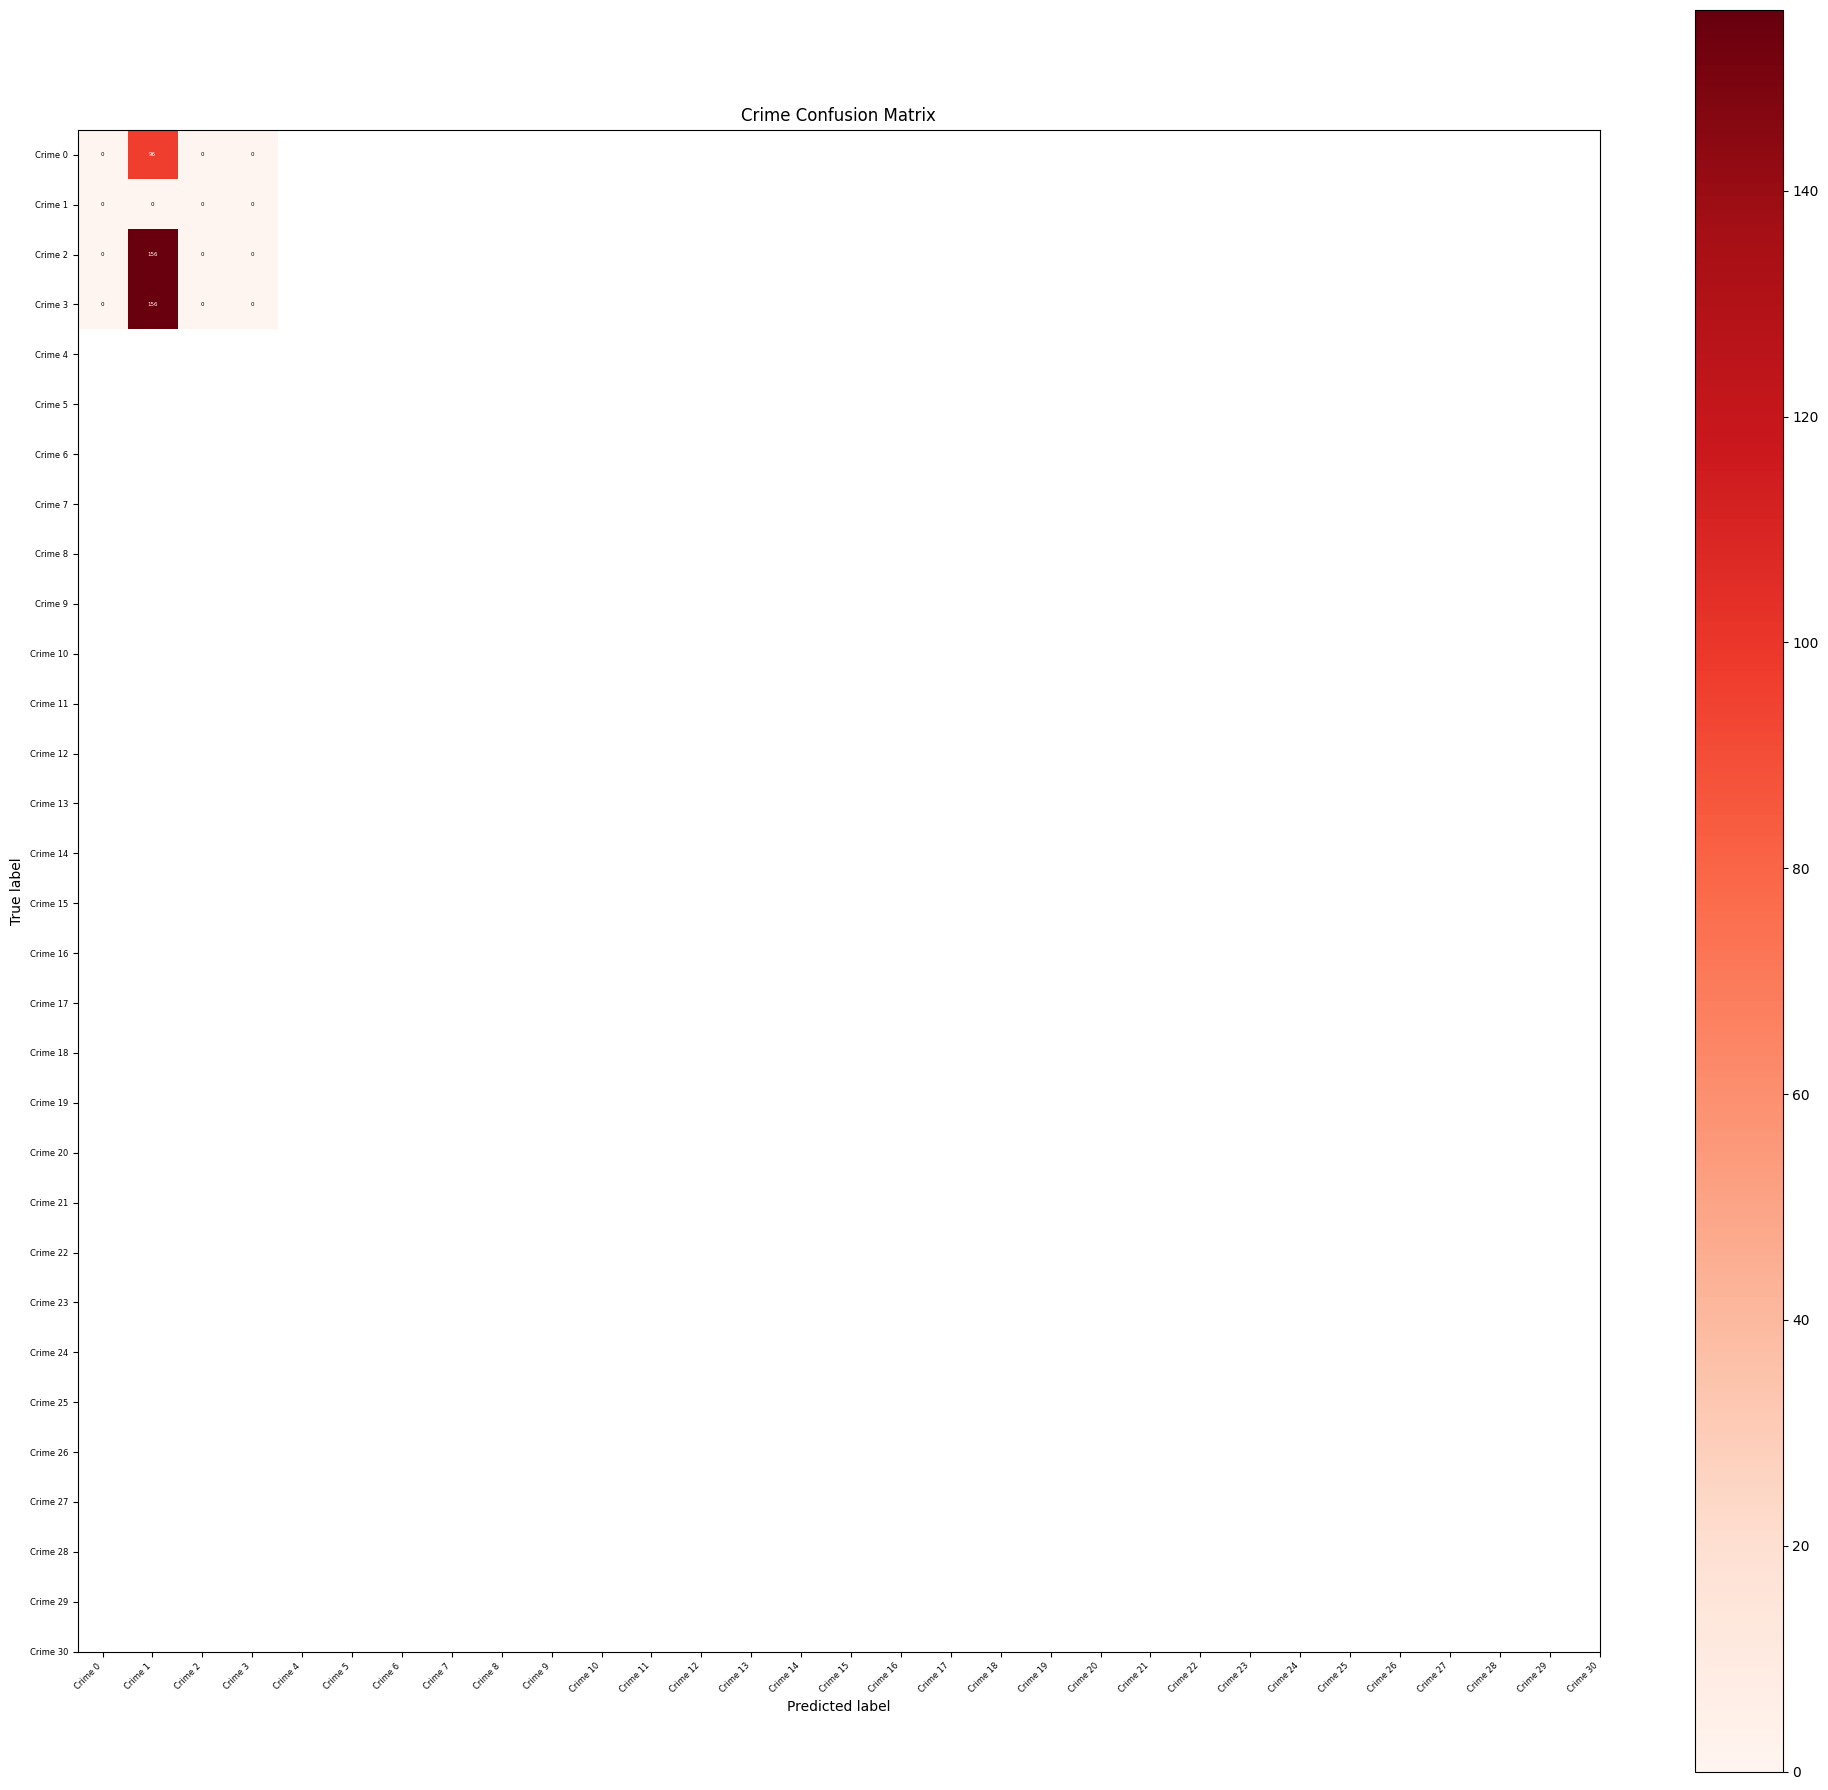

In [4]:
from models.train_models import hybrid_model_pipeline
target_columns = ['Crime_Location', 'Allegation']
hybrid_model_pipeline(train_df, test_df, target_columns)